## Sales Prediction 

In [1]:
## import the Libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

In [2]:
## read the data.

df=pd.read_csv('Advertising.csv')

In [3]:
## observe top 5 rows of data and the shape of the data.

print(df.shape)
df.head(5)

(200, 5)


,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
## look into the information of complete data.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
## observe missing values.

df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [6]:
## drop column 

df1=df.drop(['Unnamed: 0'],axis=1)

In [7]:
## caculate IQR and drop outliers

Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1

df2= df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [8]:
IQR

TV           144.450
radio         26.550
newspaper     32.350
sales          7.025
dtype: float64

In [9]:
df2.shape

(198, 4)

In [10]:
## 

outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [11]:
outlier_datapoints = detect_outlier(df2['TV'])
print(outlier_datapoints)

[]


In [12]:
outlier_datapoints = detect_outlier(df2['newspaper'])
print(outlier_datapoints)

[]


In [13]:
outlier_datapoints = detect_outlier(df2['radio'])
print(outlier_datapoints)

[]


{'whiskers': [<matplotlib.lines.Line2D at 0x19710314520>,
 'caps': [<matplotlib.lines.Line2D at 0x19710314be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x197103141c0>,
 'medians': [<matplotlib.lines.Line2D at 0x197103252e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x19710325640>,
 'means': []}

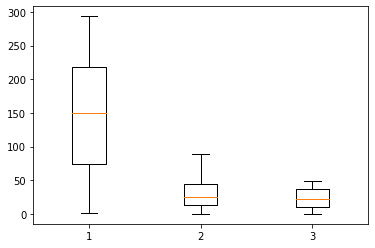

In [14]:
## plotting boxplot to find ouyliers 

plt.boxplot(df2[['TV','newspaper','radio']],vert=True)

2 outiers found and removed for better accuracy.

In [15]:
## assigning the values to X.

X=df2.drop(['sales'],axis=1)
X.head(5)

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [16]:
## assigning the values to y.

y=df2['sales']
y.head(5)

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [17]:
## looking for correlation between independent vriables.

X.corr()

,TV,radio,newspaper
TV,1.000000,0.051978,0.049771
radio,0.051978,1.000000,0.346364
newspaper,0.049771,0.346364,1.000000


In [18]:
# Import library for VIF.

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [19]:
## to check the multicollinearity.

calc_vif(X)

,variables,VIF
0,TV,2.502183
1,radio,3.275285
2,newspaper,3.126386


No multicollinearity between the independent features

In [20]:
## import train test and split.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [21]:
## import linearRegression from sklearn and fit.

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = regressor.predict(X_test)

In [23]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score*100)

90.68225024835147


In [24]:
## import statmodel and fit.

import statsmodels.api as sm

In [25]:
model = sm.OLS(y,X).fit()

In [26]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              3497.
Date:                Fri, 09 Apr 2021   Prob (F-statistic):                   3.30e-169
Time:                        18:00:36   Log-Likelihood:                         -419.61
No. Observations:                 198   AIC:                                      845.2
Df Residuals:                     195   BIC:                                      855.1
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0537      0.001     39.917      0.000       0.051       0.056
radio          0.2209      0.010     23.246      0.000       0.202       0.240
newspaper      0.0193      0.007      2.726      0.007       0.005       0.033
==============================================================================
Omnibus:                        6.474   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                7.496
Skew:                          -0.264   Prob(JB):                       0.0236
Kurtosis:                       3.794   Cond. No.                         12.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""